# Testing workflow

In [1]:
from toolbox_runner.workflow import Workflow
from toolbox_runner import list_tools

In [2]:
# get some sample data
import skgstat as skg
pancake = skg.data.pancake_field().get('sample')
pancake

Array([[214, 215, 215, ..., 188, 191, 193],
       [215, 215, 215, ..., 191, 191, 191],
       [215, 216, 215, ..., 191, 189, 191],
       ...,
       [174, 175, 173, ..., 116, 117, 115],
       [172, 172, 173, ..., 133, 138, 136],
       [174, 174, 174, ..., 129, 142, 142]], dtype=uint8)

In [3]:
tools = list_tools(as_dict=True)
print(tools)

{'variogram': variogram: Variogram fitting  FROM tbr_skgstat:latest VERSION: 1.1, 'kriging': kriging: Kriging interpolation  FROM tbr_skgstat:latest VERSION: 1.0, 'simulation': simulation: Geostatistical simulation  FROM tbr_skgstat:latest VERSION: 1.0, 'sample': sample: Sample field data  FROM tbr_skgstat:latest VERSION: 1.0, 'foobar': foobar: Foo Bar  FROM tbr_octave:latest VERSION: 0.1, 'profile': profile: Dataset Profile  FROM tbr_profile:v1.0.0 VERSION: 0.2}


In [4]:
wf = Workflow()
wf.valid

False

In [5]:
sam = tools.get('sample')
vario = tools.get('variogram')
krige = tools.get('kriging')
prof = tools.get('profile')

In [6]:
wf.add_tool(sam, field=pancake, sample_size=150, method='random', seed=42)

'sample'

In [7]:
wf.add_tool(vario, requires=['sample::coordinates.dat', 'sample::values.dat'], n_lags=15, maxlag='median')

'variogram'

In [8]:
wf.add_tool(krige, requires=['sample::coordinates.dat', 'sample::values.dat', 'variogram::variogram.json'], algorithm='ordinary', grid='100x100')

'kriging'

WORKFLOW GRAPH IS VALID: True


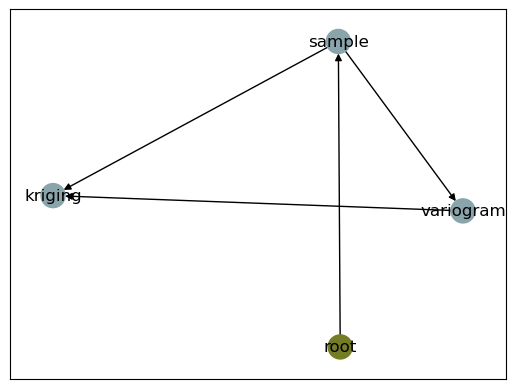

In [9]:
wf.generate_graph()
print(f"WORKFLOW GRAPH IS VALID: {wf.valid}")
wf

In [10]:
wf.work_dir

'/tmp/tmp6o_hlxw5'

## Perform the algorithm

In [11]:
wf.run()

Starting Workflow
wd: /tmp/tmp6o_hlxw5
Tools to run: 3
Found all requirements for 'sample'. Collecting dependencies...done.
Dispatching 'sample'...


exception calling callback for <Future at 0x7f319b2b88b0 state=finished returned Step>
Traceback (most recent call last):
  File "/home/mirko/anaconda3/lib/python3.9/concurrent/futures/_base.py", line 330, in _invoke_callbacks
    callback(self)
  File "/home/mirko/Dropbox/python/tool-runner/toolbox_runner/tool.py", line 111, in tool_callback
    self.FINISHED.send({self.IDENTIFIER: future.result()})
  File "/home/mirko/anaconda3/lib/python3.9/site-packages/blinker/base.py", line 263, in send
    return [(receiver, receiver(sender, **kwargs))
  File "/home/mirko/anaconda3/lib/python3.9/site-packages/blinker/base.py", line 263, in <listcomp>
    return [(receiver, receiver(sender, **kwargs))
  File "/home/mirko/Dropbox/python/tool-runner/toolbox_runner/workflow.py", line 255, in finish_subscription
    self.next_iteration(active_node=identifier, work_dir=self.work_dir)
  File "/home/mirko/Dropbox/python/tool-runner/toolbox_runner/workflow.py", line 326, in next_iteration
    dep_kwargs 


sample finished: /tmp/tmp6o_hlxw5/1668157524_sample.tar.gz
Found all requirements for 'variogram'. Collecting dependencies...

In [12]:
wf.state

{'root': 'finished',
 'sample': 'finished',
 'variogram': 'pending',
 'kriging': 'pending'}

False False False False


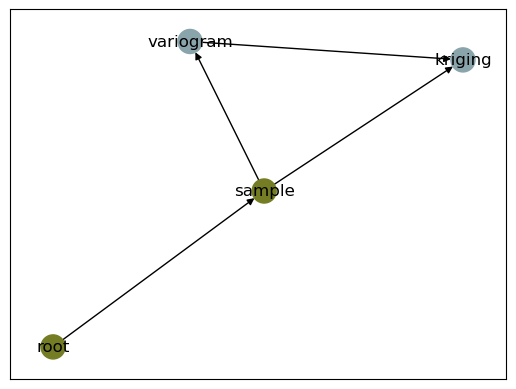

In [19]:
print(wf.running, wf.errored, wf.cancelled, wf.done)
wf

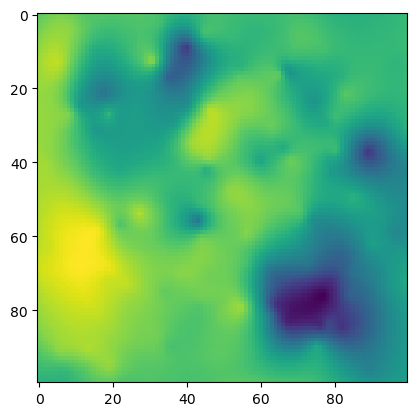

In [19]:
field = wf.steps['kriging'].get('kriging.mat')

import matplotlib.pyplot as plt
plt.imshow(field)